In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage import filters
from skimage import feature

In [2]:
print(os.listdir("C:\\Users\\Surya\\Desktop\\Poke`dex\\Pokedex"))

['train', 'val']


In [3]:
SIZE=128

# Storing Images and Labels as arrays
### Capture images and labels into arrays.
### Start by creating empty lists.

In [4]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("C:\\Users\\Surya\\Desktop\\Poke`dex\\Pokedex\\train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Abra
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\0282b2f3a22745f1a436054ea15a0ae5.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\06b9eec4827d4d49b1b4c284308708df.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\10a9f06ec6524c66b779ea80354f8519.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\1788abb8b51f48509cfac8067bd99e14.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\28cfad92ad934d1f9b579cbff4b5d012.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\2eb2a528f9a247358452b3c740df69a0.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\32240b108a8140f8b31c495166fc453c.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\34532bb006714727ade4075f0a72b92d.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\3680c3f65a484c3ba05a7cb93e1d7ae3.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\48412baa8527483d8e8ddb8555d2eeff.jpg
C:\Users\Surya\Desktop\Poke`dex\Pokedex\train\Abra\586c195c0bcd48158db71c1d7f75197c.jpg
C:\Users\Surya\Desktop\Poke

In [5]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:\\Users\\Surya\\Desktop\\Machine Learning Project\\Pokedex\\val\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Encode labels from text (folder names) to integers.
### We use label Encoding to encode labels to integers

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

# Split data into test and train datasets

In [7]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# FEATURE EXTRACTOR function

In [9]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  
        #print(image)
        
        df = pd.DataFrame()  
        
        
        input_img = x_train[image, :,:,:]
        img = input_img
    
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   
        
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  
                lamda = np.pi/4
                gamma = 0.3
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

        #Add more filters as needed
        # FEATURE 4 prewitt
        edge_prewitt = filters.prewitt(img)
        edge_prewitt1 = edge_prewitt.reshape(-1)
        df['Prewitt'] = edge_prewitt1
        
        #FEATURE 5 scharr
        edge_scharr = filters.scharr(img)
        edge_scharr1 = edge_scharr.reshape(-1)
        df['Scharr'] = edge_scharr1
        
        #FEATURE 6 canny
        #edge_canny = feature.canny(img, sigma=3)
        #edge_canny1=edge_canny.reshape(-1)
        #df['Canny'] = edge_canny1
       
        
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

# Extract features from training images

In [10]:
image_features = feature_extractor(x_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

# Reshape to a vector for SVM training

In [11]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1)) #Reshape to #images, features

In [12]:
from sklearn import svm

In [13]:
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification

In [14]:
SVM_model.fit(X_for_RF, y_train)

SVC(decision_function_shape='ovo')

# Predict on Test data
### Extract features from test data and reshape, just like training data

In [15]:
test_features = feature_extractor(x_test)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [16]:
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [17]:
test_prediction = SVM_model.predict(test_for_RF)

# Inverse le transform to get original label back. 

In [18]:
test_prediction = le.inverse_transform(test_prediction)

# Print overall accuracy

In [19]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.3493150684931507


# Print confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

In [21]:
cm

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 2, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

<AxesSubplot:>

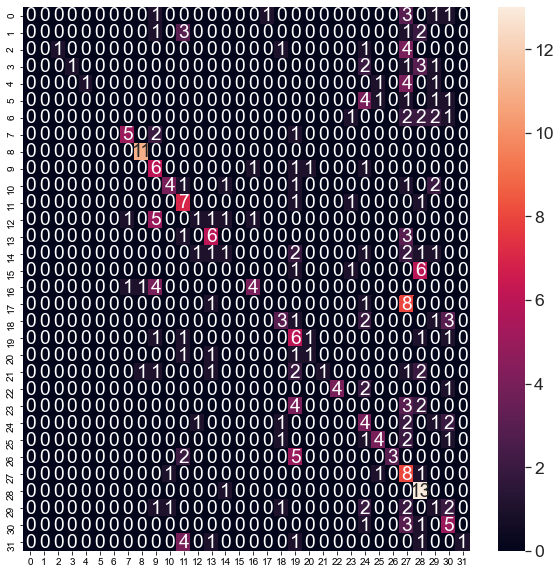

In [22]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)


# Check results on a few random images

In [23]:
import random

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
The prediction for this image is:  ['Golbat']
The actual label for this image is:  Golbat


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


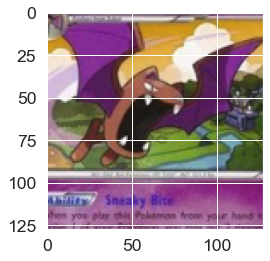

In [25]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = SVM_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# Decision Tree Model

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  

In [70]:
classifier.fit(X_for_RF, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
y_pred= classifier.predict(test_for_RF)  

In [30]:
y_pred = le.inverse_transform(y_pred)

# Accuracy

In [71]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, y_pred))

Accuracy =  0.24315068493150685


# Confusion Matrix

In [32]:
cm = confusion_matrix(test_labels, y_pred)

<AxesSubplot:>

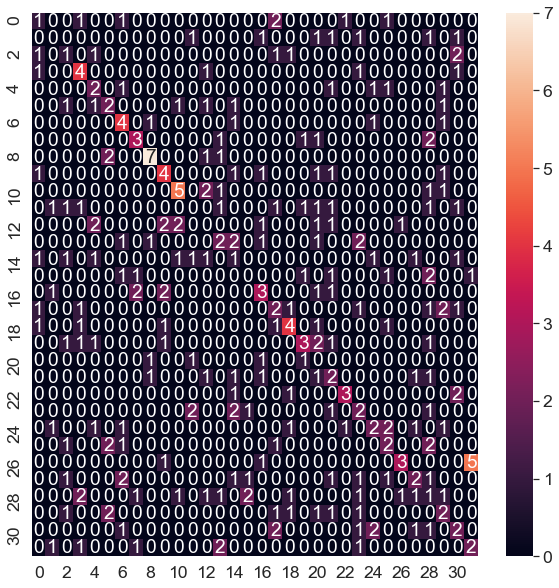

In [33]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)


# Predicting the random image

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
The prediction for this image is:  ['Onix']
The actual label for this image is:  Onix


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


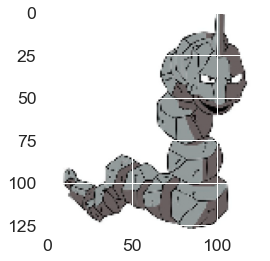

In [34]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = classifier.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# KNN Algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier  

In [36]:
kn= KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=2 )
  

In [37]:
kn.fit(X_for_RF, y_train)

KNeighborsClassifier(n_neighbors=13)

In [38]:
kny= kn.predict(test_for_RF)  

In [39]:
kny = le.inverse_transform(kny)

In [40]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, kny))

Accuracy =  0.2602739726027397


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
The prediction for this image is:  ['Sandslash']
The actual label for this image is:  Sandslash


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


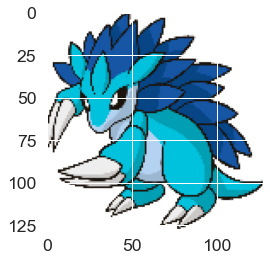

In [50]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = kn.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier 

In [52]:
rf= RandomForestClassifier(n_estimators= 50, random_state = 42)  
rf.fit(X_for_RF, y_train)  

RandomForestClassifier(n_estimators=50, random_state=42)

In [53]:
rf_y = rf.predict(test_for_RF)

In [54]:
rf_y = le.inverse_transform(rf_y)

In [55]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, rf_y))

Accuracy =  0.5171232876712328


In [56]:
cm = confusion_matrix(test_labels, rf_y)

<AxesSubplot:>

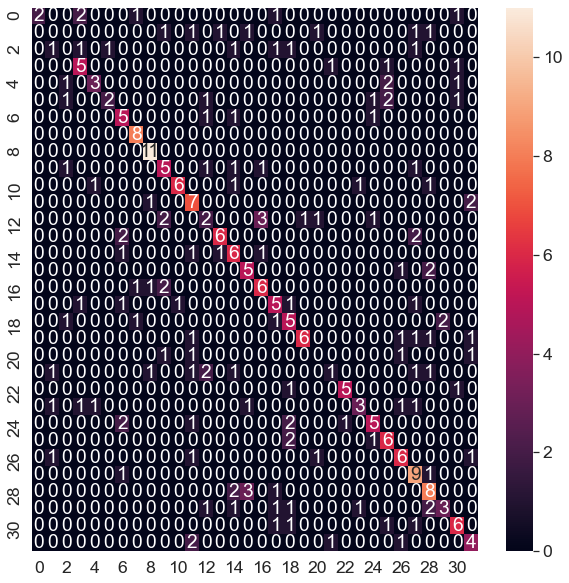

In [57]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
The prediction for this image is:  ['Diglett']
The actual label for this image is:  Diglett


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


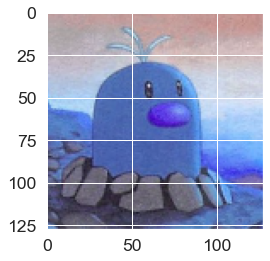

In [59]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = rf.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb = GaussianNB()  
nb.fit(X_for_RF, y_train) 

GaussianNB()

In [62]:
ynb=nb.predict(test_for_RF)

In [63]:
ynb = le.inverse_transform(ynb)

In [64]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, ynb))

Accuracy =  0.410958904109589


In [65]:
cm = confusion_matrix(test_labels, ynb)

cm

array([[2, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 1, ..., 0, 0, 2]], dtype=int64)

<AxesSubplot:>

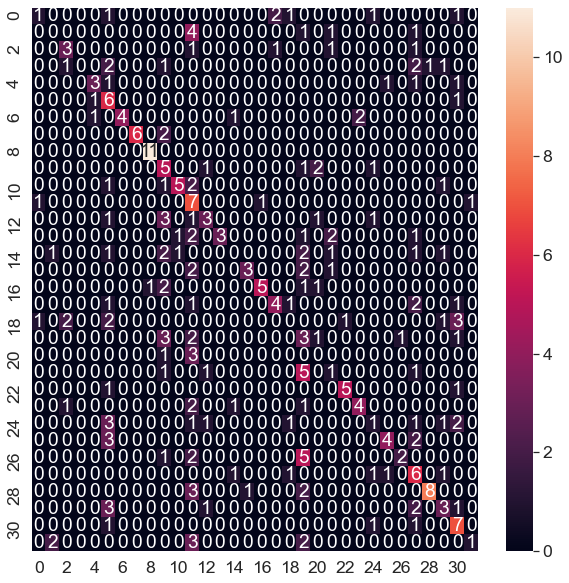

In [125]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.3
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.3
The prediction for this image is:  ['Sandslash']
The actual label for this image is:  Sandslash


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


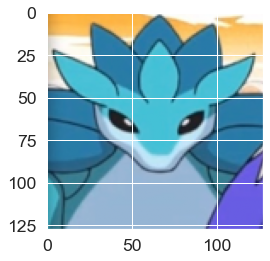

In [67]:
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = nb.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])